## Making Track Popularity Rating Predictions based on Spotify Track Features
### Hongju Lee | SI 671 - Data Mining


In [172]:
#!pip install -U imbalanced-learn
#!pip install yellowbrick
#!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 10.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.2
    Uninstalling scikit-learn-1.1.2:
      Successfully uninstalled scikit-learn-1.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
socceraction 1.2.2 requires scikit-learn<1.1.0,>=0.24.2, but you have scikit-learn 1.2.0 which is incompatible.


In [1]:
import pandas as pd
import spotipy 
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, recall_score, precision_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import RandomOverSampler
from spotipy.oauth2 import SpotifyClientCredentials
import requests

In [2]:
cid ="f876b255ec9c47afa1f150a717ac5c74" 
secret = "9d116250ff274fdca5517760c8d7e3d5" 

global_top = 'spotify:playlist:2YRe7HRKNRvXdJBp9nXFza'
alltime_top = 'spotify:playlist:1G8IpkZKobrIlXcVPoSIuf'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
#import csv track
df = pd.read_csv('tracks.csv').sample(n=20000)
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
74214,3e0wYnFxkqinmtXebYPMSt,Yellow,57,266773,0,['Coldplay'],['4gzpq5DPGxSnKTe4SA8HAU'],2000-06-26,0.429,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,4
585451,0F7uWVx3ija6orYawbWGH5,Thriving On A Riff - New Take 1,4,180333,0,['Charlie Parker'],['4Ww5mwS7BWYjoZTUIrMHfC'],1956-01-01,0.679,0.394,0,-10.332,0,0.0670,0.93900,0.152000,0.1360,0.878,110.722,4
199500,6LgGKcMoXvDtKgAp2znkKQ,La Reunión De Los Vaqueros,53,332707,0,"['Wisin & Yandel', 'Cosculluela', 'Tego Calder...","['1wZtkThiXbVNtj6hee6dz9', '00me4Ke1LsvMxt5kyd...",2010-01-01,0.845,0.845,10,-5.674,0,0.1360,0.19800,0.000001,0.1260,0.662,95.975,4
355883,5mmcPMbUKBn8cftUxFOZ43,Chervenata Shapchitsa,15,468692,0,['Antoaneta Botusharova'],['5Yct8MzKng2hjGUlB5HRZw'],1999-03-23,0.722,0.193,2,-14.706,1,0.7620,0.93800,0.000000,0.0941,0.158,119.070,4
182907,2aEo5sPcclxVbA2vXFBi9M,Firehouse Rock,38,253867,0,['Wailing Souls'],['2ffhJMXvdEJFZISX76ccQL'],1987,0.814,0.407,9,-13.455,1,0.0536,0.20000,0.002530,0.1590,0.906,130.355,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93724,0ZEYRVISCaqz5yamWZWzaA,Melukis Senja,77,251119,0,['Budi Doremi'],['6Ifk2cbxyVzT41jLexYCas'],2020-06-24,0.645,0.372,5,-9.639,1,0.0249,0.63400,0.000135,0.0853,0.361,97.996,4
25209,0JR24LYC8buXcxKXmUT9kt,"Piano Concerto No. 3 in C Minor, Op. 37: III. ...",0,547067,0,"['Ludwig van Beethoven', 'Paul Badura-Skoda', ...","['2wOqMjp9TyABvtHdOSOTUS', '2gAmSWx7vn8ZUSFDRd...",1951-01-01,0.432,0.157,8,-22.569,1,0.0337,0.98600,0.838000,0.1560,0.378,114.439,4
290822,450mxh4GhbeVo8gePwsSx1,Na Me Prosecheis,31,239373,0,['Dionysis Savvopoulos'],['1QZ7r36PUiIEvT05v1kKt1'],1996,0.445,0.137,4,-15.141,0,0.0382,0.90800,0.000002,0.0996,0.238,116.214,4
174609,3f6Gvh0uJBGe6jMssyTicz,Viidestoista yö,31,248560,0,['Juice Leskinen Slam'],['1F5luCKmbkRLdxkqPcZJOc'],2008-01-07,0.504,0.581,2,-9.744,1,0.0328,0.23500,0.000073,0.1760,0.687,136.372,4


In [4]:
#clean columns and date column
clean_df = df[["id", "release_date", "popularity", "duration_ms","danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness","valence","tempo"]]
clean_df["release_date"] = pd.to_datetime(clean_df["release_date"])
clean_df["release_date"] = clean_df["release_date"].dt.year
clean_df["duration_min"] = clean_df["duration_ms"]/60000
clean_df

/var/folders/5z/c8_lcxln56s7bp2fwgmm4gsc0000gn/T/ipykernel_77282/2317845217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["release_date"] = pd.to_datetime(clean_df["release_date"])
/var/folders/5z/c8_lcxln56s7bp2fwgmm4gsc0000gn/T/ipykernel_77282/2317845217.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["release_date"] = clean_df["release_date"].dt.year
/var/folders/5z/c8_lcxln56s7bp2fwgmm4gsc0000gn/T/ipykernel_77282/2317845217.py:5: SettingWithCopyWarning: 
A value is trying to 

,id,release_date,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
74214,3e0wYnFxkqinmtXebYPMSt,2000,57,266773,0.429,0.661,-7.227,0.0281,0.00239,0.000121,0.2340,0.285,173.372,4.446217
585451,0F7uWVx3ija6orYawbWGH5,1956,4,180333,0.679,0.394,-10.332,0.0670,0.93900,0.152000,0.1360,0.878,110.722,3.005550
199500,6LgGKcMoXvDtKgAp2znkKQ,2010,53,332707,0.845,0.845,-5.674,0.1360,0.19800,0.000001,0.1260,0.662,95.975,5.545117
355883,5mmcPMbUKBn8cftUxFOZ43,1999,15,468692,0.722,0.193,-14.706,0.7620,0.93800,0.000000,0.0941,0.158,119.070,7.811533
182907,2aEo5sPcclxVbA2vXFBi9M,1987,38,253867,0.814,0.407,-13.455,0.0536,0.20000,0.002530,0.1590,0.906,130.355,4.231117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93724,0ZEYRVISCaqz5yamWZWzaA,2020,77,251119,0.645,0.372,-9.639,0.0249,0.63400,0.000135,0.0853,0.361,97.996,4.185317
25209,0JR24LYC8buXcxKXmUT9kt,1951,0,547067,0.432,0.157,-22.569,0.0337,0.98600,0.838000,0.1560,0.378,114.439,9.117783
290822,450mxh4GhbeVo8gePwsSx1,1996,31,239373,0.445,0.137,-15.141,0.0382,0.90800,0.000002,0.0996,0.238,116.214,3.989550
174609,3f6Gvh0uJBGe6jMssyTicz,2008,31,248560,0.504,0.581,-9.744,0.0328,0.23500,0.000073,0.1760,0.687,136.372,4.142667


In [5]:
#set id as index 
clean_df = clean_df.set_index("id")
clean_df = clean_df.loc[:, clean_df.columns != "duration_ms"]
clean_df

,release_date,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
id,,,,,,,,,,,,
3e0wYnFxkqinmtXebYPMSt,2000,57,0.429,0.661,-7.227,0.0281,0.00239,0.000121,0.2340,0.285,173.372,4.446217
0F7uWVx3ija6orYawbWGH5,1956,4,0.679,0.394,-10.332,0.0670,0.93900,0.152000,0.1360,0.878,110.722,3.005550
6LgGKcMoXvDtKgAp2znkKQ,2010,53,0.845,0.845,-5.674,0.1360,0.19800,0.000001,0.1260,0.662,95.975,5.545117
5mmcPMbUKBn8cftUxFOZ43,1999,15,0.722,0.193,-14.706,0.7620,0.93800,0.000000,0.0941,0.158,119.070,7.811533
2aEo5sPcclxVbA2vXFBi9M,1987,38,0.814,0.407,-13.455,0.0536,0.20000,0.002530,0.1590,0.906,130.355,4.231117
...,...,...,...,...,...,...,...,...,...,...,...,...
0ZEYRVISCaqz5yamWZWzaA,2020,77,0.645,0.372,-9.639,0.0249,0.63400,0.000135,0.0853,0.361,97.996,4.185317
0JR24LYC8buXcxKXmUT9kt,1951,0,0.432,0.157,-22.569,0.0337,0.98600,0.838000,0.1560,0.378,114.439,9.117783
450mxh4GhbeVo8gePwsSx1,1996,31,0.445,0.137,-15.141,0.0382,0.90800,0.000002,0.0996,0.238,116.214,3.989550


In [6]:
def scale_column(column):
    scaler = MinMaxScaler()
    return scaler.fit_transform(np.array(column).reshape(-1,1))

In [7]:
#apply minmax scaling
clean_df["loudness"] = scale_column(clean_df["loudness"])
clean_df["tempo"] = scale_column(clean_df["tempo"])
#clean_df["popularity"] = scale_column(clean_df["popularity"])
#clean_df["duration_min"] = scale_column(clean_df["duration_min"])

clean_df

,release_date,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
id,,,,,,,,,,,,
3e0wYnFxkqinmtXebYPMSt,2000,57,0.429,0.661,0.842172,0.0281,0.00239,0.000121,0.2340,0.285,0.722666,4.446217
0F7uWVx3ija6orYawbWGH5,1956,4,0.679,0.394,0.792621,0.0670,0.93900,0.152000,0.1360,0.878,0.461522,3.005550
6LgGKcMoXvDtKgAp2znkKQ,2010,53,0.845,0.845,0.866955,0.1360,0.19800,0.000001,0.1260,0.662,0.400053,5.545117
5mmcPMbUKBn8cftUxFOZ43,1999,15,0.722,0.193,0.722819,0.7620,0.93800,0.000000,0.0941,0.158,0.496319,7.811533
2aEo5sPcclxVbA2vXFBi9M,1987,38,0.814,0.407,0.742783,0.0536,0.20000,0.002530,0.1590,0.906,0.543359,4.231117
...,...,...,...,...,...,...,...,...,...,...,...,...
0ZEYRVISCaqz5yamWZWzaA,2020,77,0.645,0.372,0.803680,0.0249,0.63400,0.000135,0.0853,0.361,0.408477,4.185317
0JR24LYC8buXcxKXmUT9kt,1951,0,0.432,0.157,0.597338,0.0337,0.98600,0.838000,0.1560,0.378,0.477016,9.117783
450mxh4GhbeVo8gePwsSx1,1996,31,0.445,0.137,0.715877,0.0382,0.90800,0.000002,0.0996,0.238,0.484415,3.989550


In [8]:
#reorder columns
clean_df = clean_df[['release_date','duration_min','popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
clean_df

,release_date,duration_min,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,,,,
3e0wYnFxkqinmtXebYPMSt,2000,4.446217,57,0.429,0.661,0.842172,0.0281,0.00239,0.000121,0.2340,0.285,0.722666
0F7uWVx3ija6orYawbWGH5,1956,3.005550,4,0.679,0.394,0.792621,0.0670,0.93900,0.152000,0.1360,0.878,0.461522
6LgGKcMoXvDtKgAp2znkKQ,2010,5.545117,53,0.845,0.845,0.866955,0.1360,0.19800,0.000001,0.1260,0.662,0.400053
5mmcPMbUKBn8cftUxFOZ43,1999,7.811533,15,0.722,0.193,0.722819,0.7620,0.93800,0.000000,0.0941,0.158,0.496319
2aEo5sPcclxVbA2vXFBi9M,1987,4.231117,38,0.814,0.407,0.742783,0.0536,0.20000,0.002530,0.1590,0.906,0.543359
...,...,...,...,...,...,...,...,...,...,...,...,...
0ZEYRVISCaqz5yamWZWzaA,2020,4.185317,77,0.645,0.372,0.803680,0.0249,0.63400,0.000135,0.0853,0.361,0.408477
0JR24LYC8buXcxKXmUT9kt,1951,9.117783,0,0.432,0.157,0.597338,0.0337,0.98600,0.838000,0.1560,0.378,0.477016
450mxh4GhbeVo8gePwsSx1,1996,3.989550,31,0.445,0.137,0.715877,0.0382,0.90800,0.000002,0.0996,0.238,0.484415


#### Average feature and duration by year

In [9]:
#average feature by year dataframe
avgbyyear = clean_df.loc[:,~clean_df.columns.isin(["duration_min","popularity","release_date"])].groupby(clean_df["release_date"]).median()
avgbyyear.head()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
release_date,,,,,,,,,
1922,0.5580,0.2830,0.752709,0.0646,0.9850,0.002280,0.1630,0.608,0.402787
1923,0.6235,0.2400,0.671130,0.5445,0.8800,0.000000,0.1725,0.720,0.450208
1924,0.6205,0.3185,0.727543,0.2445,0.9575,0.000004,0.1950,0.526,0.512522
1925,0.6560,0.2260,0.712957,0.0916,0.9500,0.001500,0.2260,0.569,0.426146
1926,0.6330,0.2380,0.734197,0.0877,0.9800,0.192000,0.2020,0.565,0.447596


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

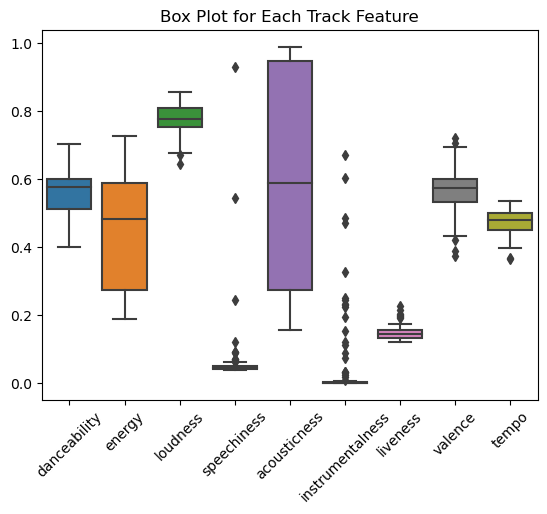

In [10]:
#boxplot for each feature
sns.boxplot(data=avgbyyear).set(title = "Box Plot for Each Track Feature")
plt.xticks(rotation=45)

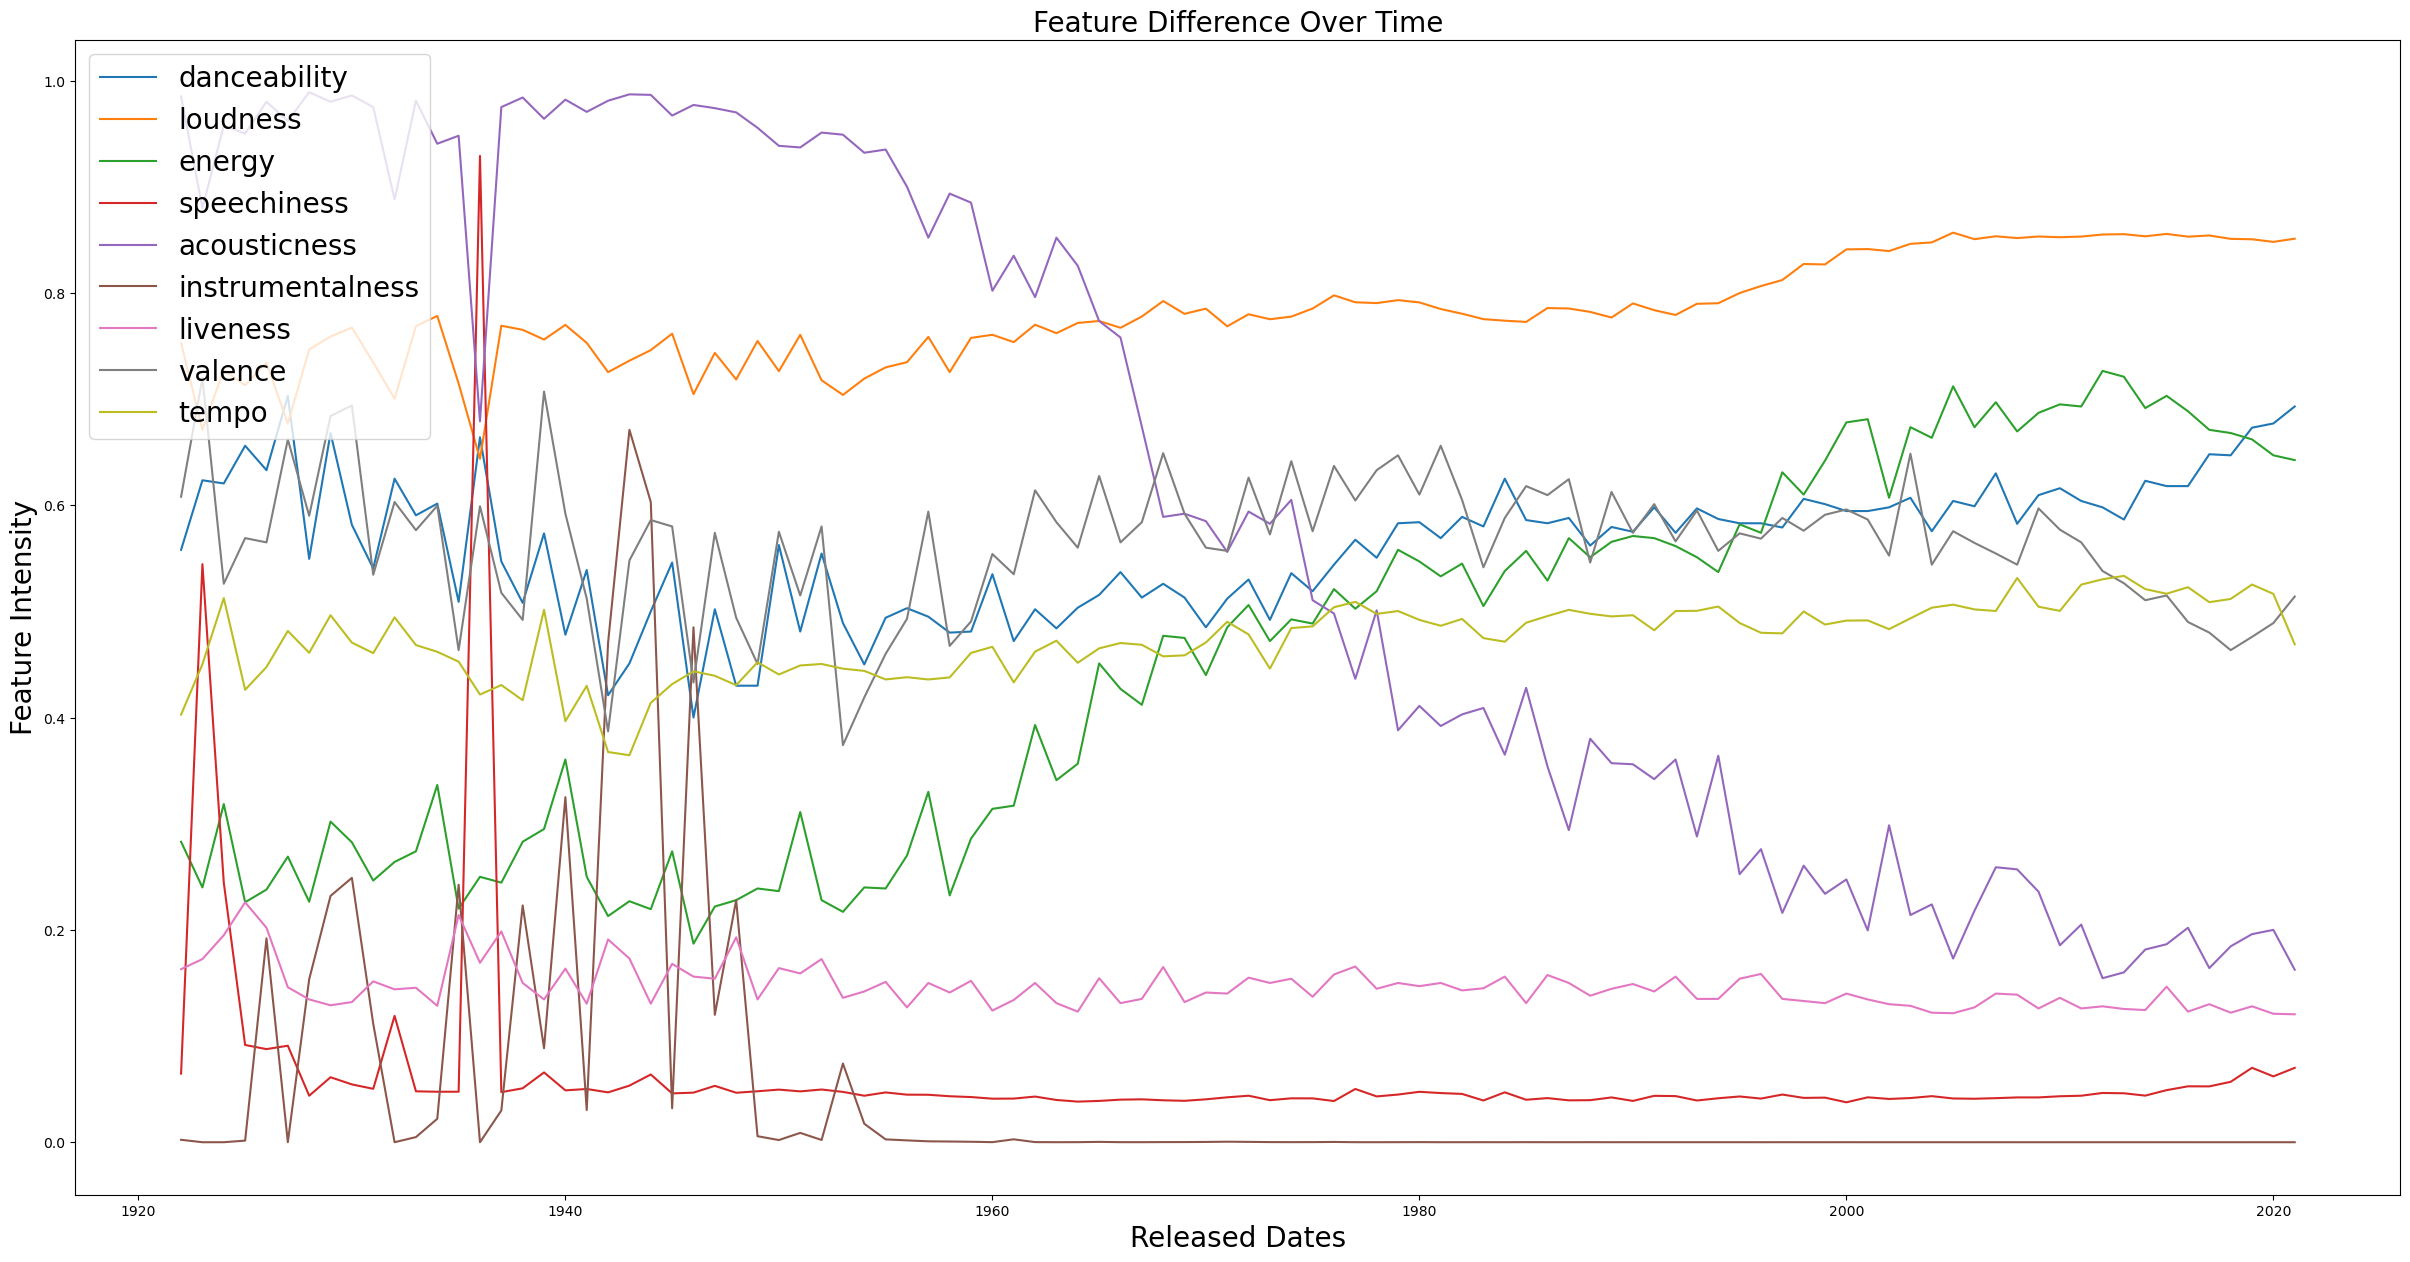

In [11]:
#line plot for each feature by released date
ax = avgbyyear.reset_index().plot(x="release_date", y=["danceability", "loudness", "energy", "speechiness", "acousticness","instrumentalness","liveness","valence","tempo"], figsize=(30,15))
plt.title("Feature Difference Over Time", fontsize=20)

ax.set_xlabel('Released Dates',fontsize = 20)
ax.set_ylabel('Feature Intensity',fontsize = 20)

plt.legend(loc = 2, prop={'size': 20})
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbd0ba8fa0>,
      dtype=object)

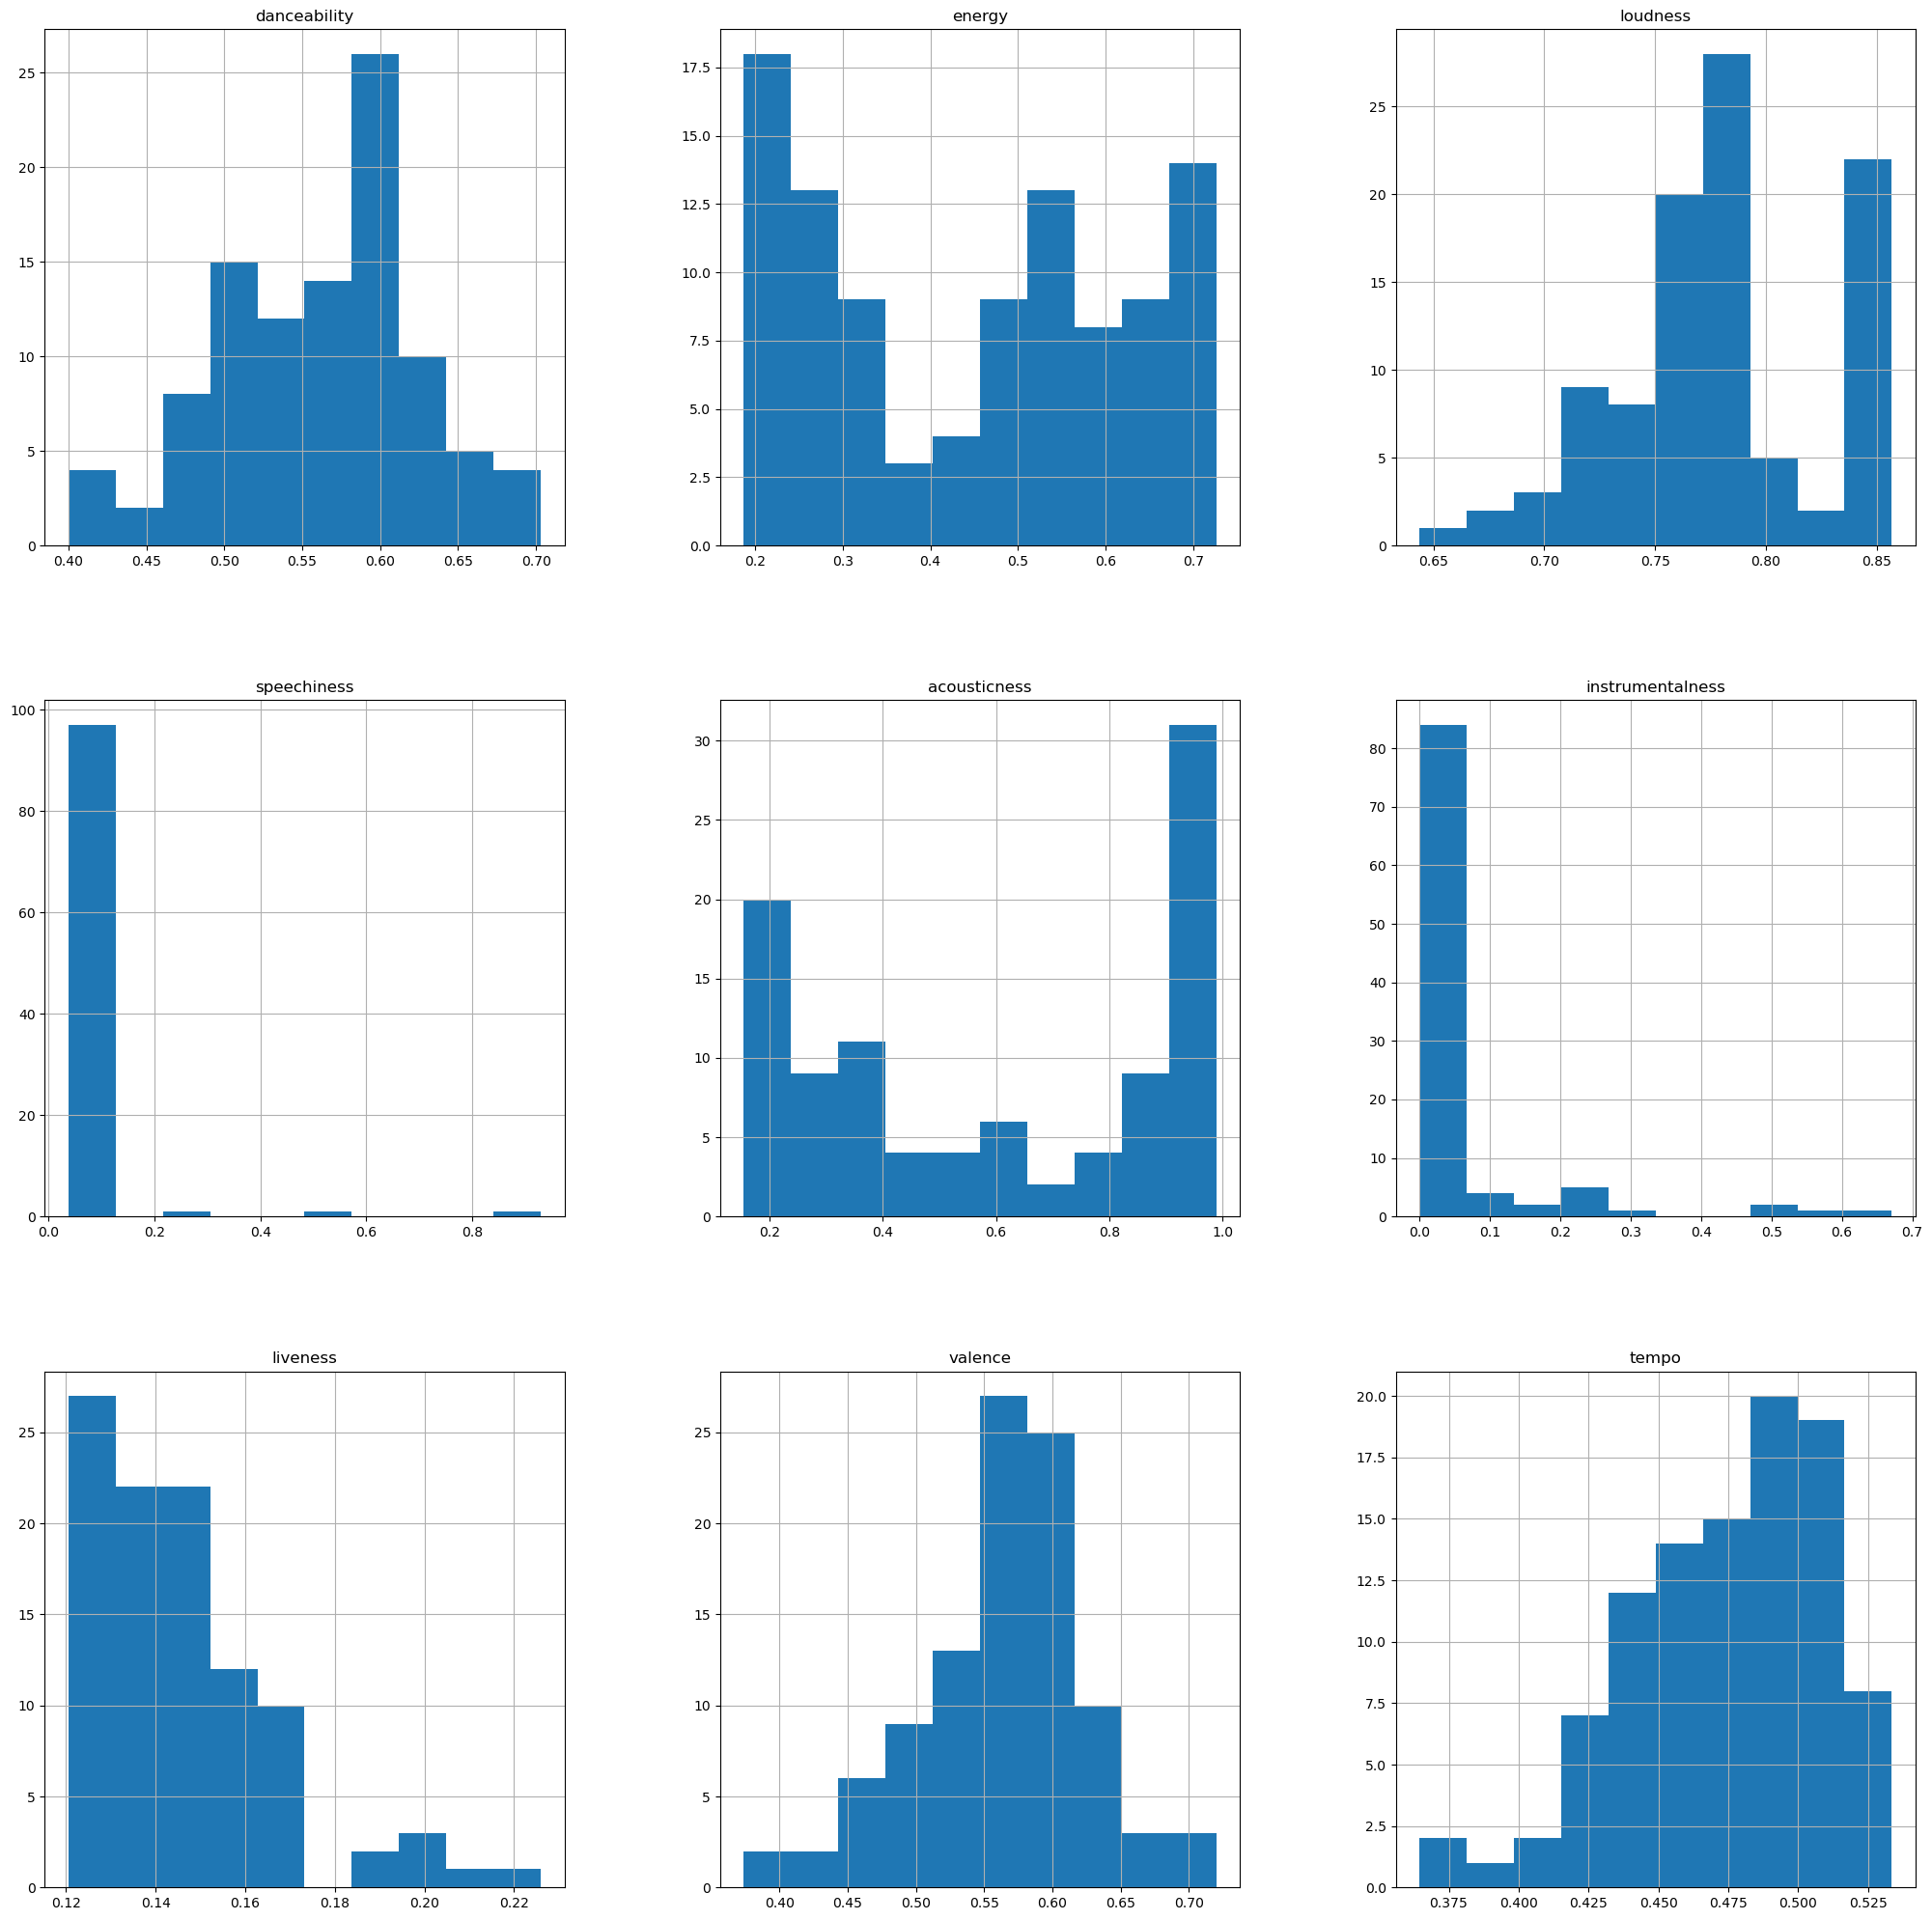

In [12]:
#histograms for each feature by released date
avgbyyear.hist(figsize=(25,25))

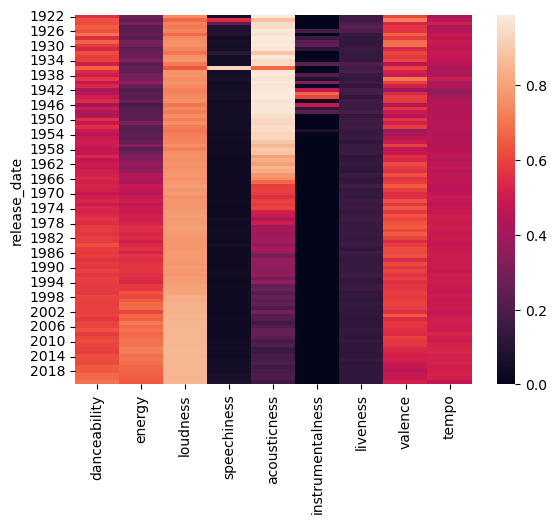

In [13]:
#heatmap for each feature by release date
sns.heatmap(avgbyyear)

In [14]:
#correlation between features
avgbyyear.corr()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.523514,0.400488,0.250659,-0.537016,-0.407772,-0.187177,0.340230,0.602066
energy,0.523514,1.000000,0.906656,-0.207621,-0.974213,-0.446906,-0.500158,0.130996,0.784749
loudness,0.400488,0.906656,1.000000,-0.409043,-0.839969,-0.322027,-0.552227,0.007559,0.678287
speechiness,0.250659,-0.207621,-0.409043,1.000000,0.120273,-0.036744,0.227987,0.156793,-0.152060
acousticness,-0.537016,-0.974213,-0.839969,0.120273,1.000000,0.448018,0.463787,-0.079909,-0.762273
instrumentalness,-0.407772,-0.446906,-0.322027,-0.036744,0.448018,1.000000,0.274204,-0.175967,-0.558088
liveness,-0.187177,-0.500158,-0.552227,0.227987,0.463787,0.274204,1.000000,-0.028623,-0.479170
valence,0.340230,0.130996,0.007559,0.156793,-0.079909,-0.175967,-0.028623,1.000000,0.203798
tempo,0.602066,0.784749,0.678287,-0.152060,-0.762273,-0.558088,-0.479170,0.203798,1.000000


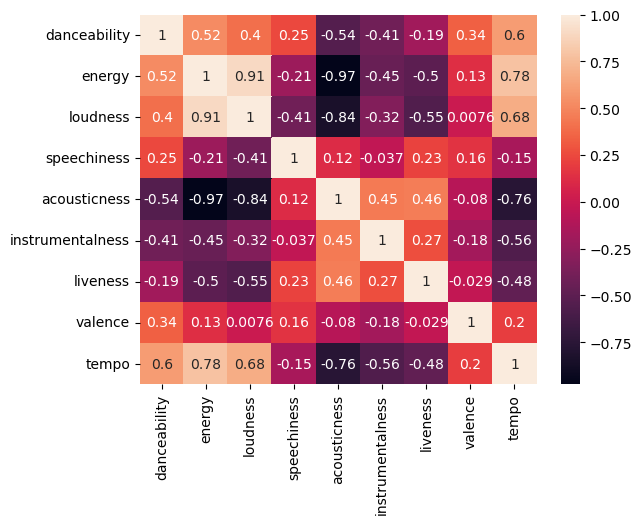

In [15]:
sns.heatmap(avgbyyear.corr(), annot=True)

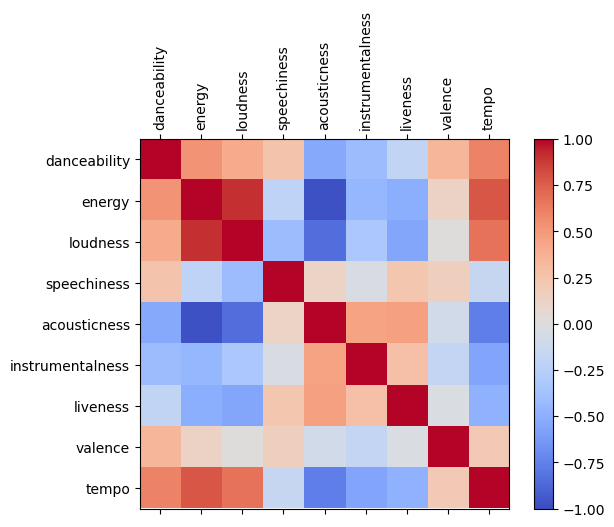

In [16]:
corr = avgbyyear.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(avgbyyear.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(avgbyyear.columns)
ax.set_yticklabels(avgbyyear.columns)
plt.show()

### KMean Cluster

In [17]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [18]:
top_features = clean_df.loc[:,["release_date","acousticness","valence"]]
top_features

,release_date,acousticness,valence
id,,,
3e0wYnFxkqinmtXebYPMSt,2000,0.00239,0.285
0F7uWVx3ija6orYawbWGH5,1956,0.93900,0.878
6LgGKcMoXvDtKgAp2znkKQ,2010,0.19800,0.662
5mmcPMbUKBn8cftUxFOZ43,1999,0.93800,0.158
2aEo5sPcclxVbA2vXFBi9M,1987,0.20000,0.906
...,...,...,...
0ZEYRVISCaqz5yamWZWzaA,2020,0.63400,0.361
0JR24LYC8buXcxKXmUT9kt,1951,0.98600,0.378
450mxh4GhbeVo8gePwsSx1,1996,0.90800,0.238


In [19]:
pca = PCA(n_components=3)
features_pca = pca.fit_transform(top_features)

/Users/hongjulee/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hongjulee/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hongjulee/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hongjulee/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

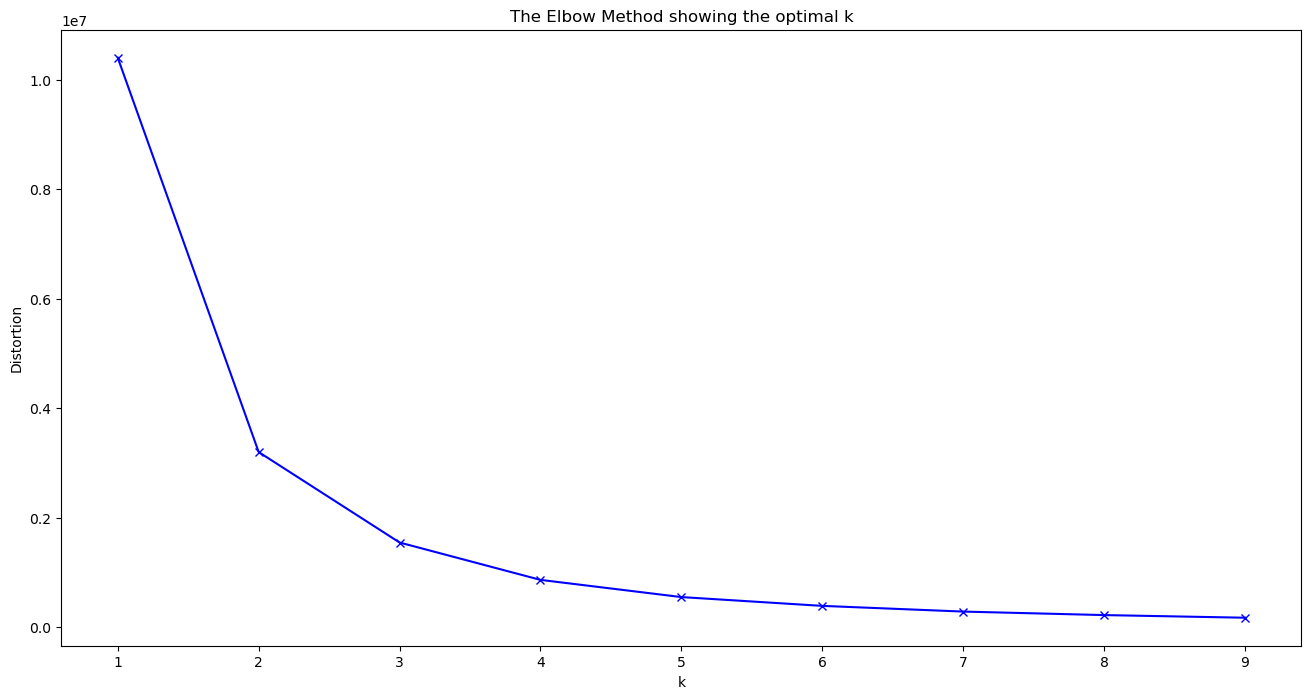

In [20]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(top_features)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
from mpl_toolkits.mplot3d import Axes3D

/Users/hongjulee/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


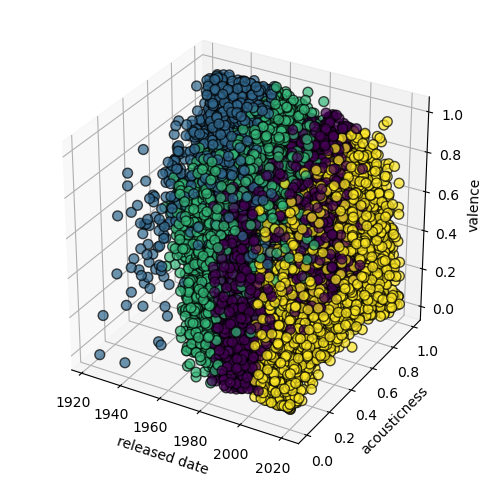

In [22]:
kmeanModel = KMeans(n_clusters=4)
top_features["k_means"] = kmeanModel.fit_predict(top_features)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(top_features["release_date"],top_features["acousticness"],top_features["valence"],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 50,
          c=top_features["k_means"])

ax.set_xlabel('released date', rotation=150)
ax.set_ylabel('acousticness')
ax.set_zlabel('valence', rotation=60)

plt.show()

/Users/hongjulee/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


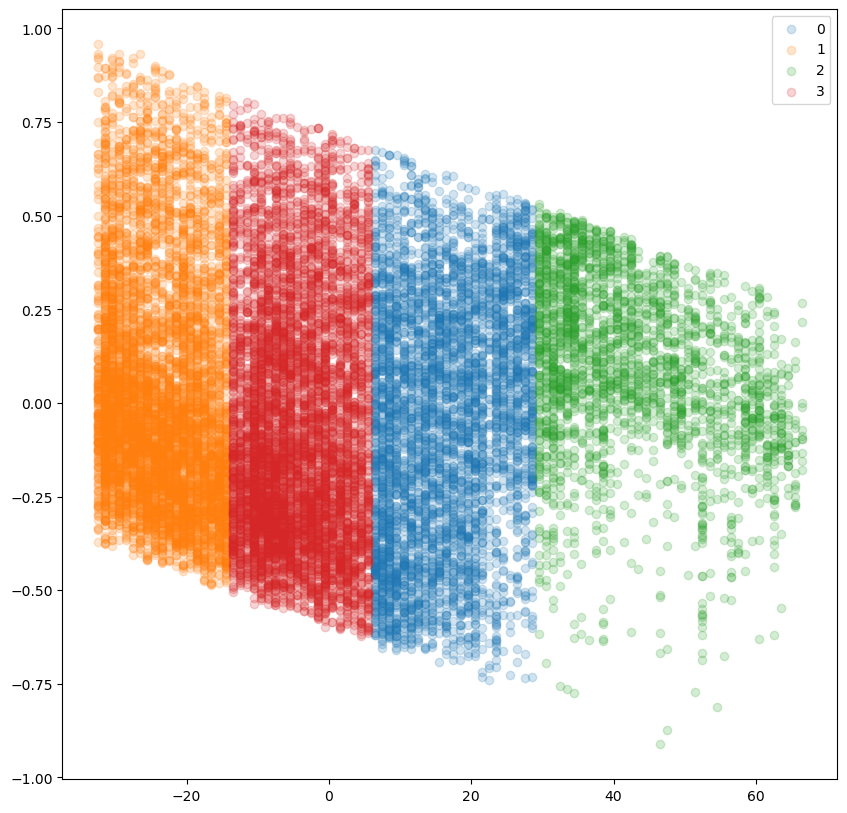

In [23]:
kmeanModel = KMeans(n_clusters=4, init = "k-means++")
label = kmeanModel.fit_predict(features_pca)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(features_pca[label == i , 0] , features_pca[label == i , 1] , label = i, alpha=0.2)
plt.legend()
plt.show()

In [24]:
#convert popularity column to categorical data
classified_df = clean_df.copy()
classified_df["popularity_bins"] = pd.cut(classified_df.loc[:,"popularity"], bins = 5, labels = [0,1,2,3,4])
classified_df


,release_date,duration_min,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity_bins
id,,,,,,,,,,,,,
3e0wYnFxkqinmtXebYPMSt,2000,4.446217,57,0.429,0.661,0.842172,0.0281,0.00239,0.000121,0.2340,0.285,0.722666,3
0F7uWVx3ija6orYawbWGH5,1956,3.005550,4,0.679,0.394,0.792621,0.0670,0.93900,0.152000,0.1360,0.878,0.461522,0
6LgGKcMoXvDtKgAp2znkKQ,2010,5.545117,53,0.845,0.845,0.866955,0.1360,0.19800,0.000001,0.1260,0.662,0.400053,2
5mmcPMbUKBn8cftUxFOZ43,1999,7.811533,15,0.722,0.193,0.722819,0.7620,0.93800,0.000000,0.0941,0.158,0.496319,0
2aEo5sPcclxVbA2vXFBi9M,1987,4.231117,38,0.814,0.407,0.742783,0.0536,0.20000,0.002530,0.1590,0.906,0.543359,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0ZEYRVISCaqz5yamWZWzaA,2020,4.185317,77,0.645,0.372,0.803680,0.0249,0.63400,0.000135,0.0853,0.361,0.408477,4
0JR24LYC8buXcxKXmUT9kt,1951,9.117783,0,0.432,0.157,0.597338,0.0337,0.98600,0.838000,0.1560,0.378,0.477016,0
450mxh4GhbeVo8gePwsSx1,1996,3.989550,31,0.445,0.137,0.715877,0.0382,0.90800,0.000002,0.0996,0.238,0.484415,1


In [25]:
type(clean_df.release_date[0])

numpy.int64

In [26]:
#value counts
classified_df.popularity_bins.value_counts()

1    7157
0    6816
2    4518
3    1405
4     104
Name: popularity_bins, dtype: int64

In [27]:
#set target and feature column
X = classified_df.loc[:, ~classified_df.columns.isin(["popularity_bins", "popularity"])]
y = classified_df.loc[:,"popularity_bins"]

In [28]:
#resample imbalance popularity binned data
ROS = RandomOverSampler()
X, y = ROS.fit_resample(X, y)

In [29]:
y.value_counts()

0    7157
1    7157
2    7157
3    7157
4    7157
Name: popularity_bins, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[0.20198911 0.06931241 0.08170885 0.08349969 0.08152356 0.07966979
 0.1040275  0.06356545 0.07119983 0.08656773 0.07693608]


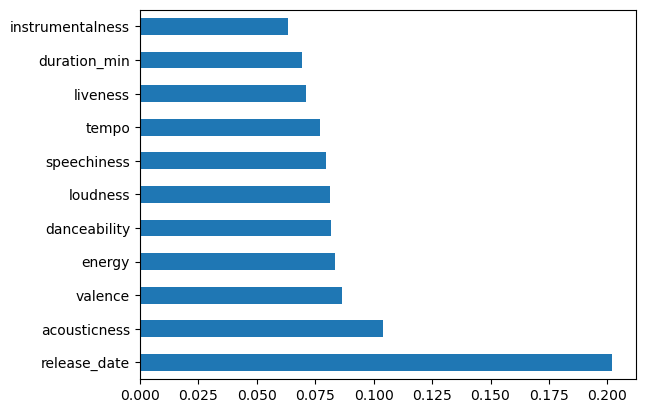

In [31]:
#find the top important features
fi_model = ExtraTreesClassifier()
fi_model.fit(X_train, y_train)
print(fi_model.feature_importances_)
feat_importances = pd.Series(fi_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [32]:
from sklearn.metrics import classification_report

In [43]:
# Logistic Regression
def logireg(X_train, X_test, y_train, y_test):
    logireg = LogisticRegression(max_iter=1000)
    logireg.fit(X_train, y_train)
    prediction = logireg.predict(X_test)
    logireg_scores = f1_score(y_test, prediction, average = 'macro')
    rocauc = roc_auc_score(y_test, logireg.predict_proba(X_test), multi_class='ovr')
    return logireg_scores, rocauc

# Random Forest Classifier
def rf(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(random_state=0)
    rf.fit(X_train, y_train)
    prediction = rf.predict(X_test)
    rf_scores = f1_score(y_test, prediction, average = 'macro')
    rocauc = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr')

    return rf_scores, rocauc


# Ridge
def ridge(X_train, X_test, y_train, y_test):
    ridge = RidgeClassifier()
    ridge.fit(X_train, y_train)
    prediction = ridge.predict(X_test)
    ridge_scores = f1_score(y_test, prediction, average = 'macro')
    rocauc = roc_auc_score(y_test, ridge.predict_proba(X_test), multi_class='ovr')

    return ridge_scores, rocauc


# k Nearest Neighbor
def knn(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    knn_scores = f1_score(y_test, prediction, average = 'macro')
    rocauc = roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovr')

    return knn_scores, rocauc


# Support Vector
def svc(X_train, X_test, y_train, y_test):
    svc = SVC(probability=True)
    svc.fit(X_train, y_train)
    prediction = svc.predict(X_test)
    svc_scores = f1_score(y_test, prediction, average = 'macro')
    rocauc = roc_auc_score(y_test, svc.predict_proba(X_test), multi_class='ovr')

    return svc_scores, rocauc


# XGBoost Classifier
def xgb_cl(X_train, X_test, y_train, y_test):
    xbg_cl = xgb.XGBClassifier(random_state=0, n_estimators = 50)
    xbg_cl.fit(X_train, y_train)
    prediction = xbg_cl.predict(X_test)
    xg_scores = f1_score(y_test, prediction, average = 'macro')

    return xg_scores


# GradientBoostingClassifier
def gbc(X_train, X_test, y_train, y_test):
    gbc = GradientBoostingClassifier(random_state=0, n_estimators = 50)
    gbc.fit(X_train, y_train)
    prediction = gbc.predict(X_test)
    gra_scores = f1_score(y_test, prediction, average = 'macro')
    rocauc = roc_auc_score(y_test, gbc.predict_proba(X_test), multi_class='ovr')

    return gra_scores, rocauc


# Ada Boost Classifier
def ada(X_train, X_test, y_train, y_test):
    ada_c = AdaBoostClassifier(random_state=0, n_estimators = 50)
    ada_c.fit(X_train, y_train)
    prediction = ada_c.predict(X_test)
    ada_scores = f1_score(y_test, prediction, average = 'macro')

    return ada_scores


# Multi-layer Perceptron
def mlp(X_train, X_test, y_train, y_test):
    mlp_c = MLPClassifier(random_state=1, max_iter=700, activation = 'tanh').fit(X_train, y_train.values.ravel())
    prediction =mlp_c.predict(X_test)
    mlp_scores = f1_score(y_test, prediction, average = 'macro')

    return mlp_scores


In [44]:
print(f"f1 score and ROC AUC score for RF: {rf(X_train, X_test, y_train, y_test)}.")
print(f"f1 score and ROC AUC score for Logistic regression: {logireg(X_train, X_test, y_train, y_test)}.")
print(f"f1 score and ROC AUC score for KNN: {knn(X_train, X_test, y_train, y_test)}.")
print(f"f1 score and ROC AUC score for SVM: {svc(X_train, X_test, y_train, y_test)}.")
print(f"f1 score for XGBoost: {xgb_cl(X_train, X_test, y_train, y_test)}.")
print(f"f1 score and ROC AUC score for GB: {gbc(X_train, X_test, y_train, y_test)}.")
print(f"f1 score score for Ada: {ada(X_train, X_test, y_train, y_test)}.")
print(f"f1 score for MLP: {mlp(X_train, X_test, y_train, y_test)}.")

f1 score and ROC AUC score for RF: (0.7980401290177555, 0.9565777325674085).
f1 score and ROC AUC score for Logistic regression: (0.3083699345911416, 0.6583084854083558).
f1 score and ROC AUC score for KNN: (0.669846666969052, 0.8815664392544121).
f1 score and ROC AUC score for SVM: (0.2849076908743477, 0.7575497130226393).
f1 score for XGBoost: 0.7128337284451822.
f1 score and ROC AUC score for GB: (0.5767270242321445, 0.8516099956418792).
f1 score score for Ada: 0.44786651019672225.
f1 score for MLP: 0.06434517528432407.


In [45]:
#hypertuning the best model
params = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [5,20,50,100],
         'bootstrap' : [True, False]}
rf_classifier = RandomForestClassifier()
search = RandomizedSearchCV(estimator=rf_classifier,
                            param_distributions=params)

search.fit(X_train,y_train)
best_param = search.best_estimator_
prediction = best_param.predict(X_test)
#accuracy = search.score(y_test, prediction)
f1score = f1_score(y_test, prediction, average = 'macro')
precision = precision_score(y_test, prediction, average = 'macro')
recall = recall_score(y_test, prediction, average = 'macro')
rocauc = roc_auc_score(y_test, search.predict_proba(X_test), multi_class='ovr')
rf_class = search.classes_


/Users/hongjulee/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongjulee/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongjulee/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

/Users/hongjulee/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongjulee/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/hongjulee/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

In [48]:
print(f"best parameter for {best_param}")
print(f"precision score is {precision}, recall score is {recall}, f1 score is {f1score}, ROC AUC score is {rocauc}")
      
      

best parameter for RandomForestClassifier(bootstrap=False, max_depth=60, max_features='auto',
                       min_samples_split=5)
precision score is 0.8038284197289367, recall score is 0.8038284197289367, f1 score is 0.8038284197289367, ROC AUC score is 0.9582705593951232


In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

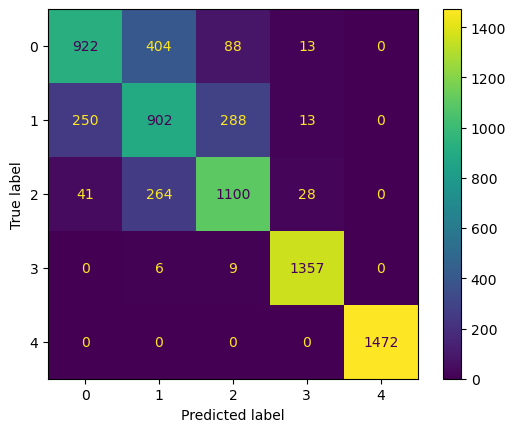

In [50]:
cm = confusion_matrix(y_test, prediction, labels=rf_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_class)
disp.plot()
plt.show()
disp.figure_.savefig('conf_matrix.png')